## Quick demo showing how to get Mean Volume Backscattering Strength (MVBS) with `echopype`

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

**Specify raw *AZFP* file and XML file**

In [5]:
azfp_xml_path = 'D:\\Documents\\Projects\\echopype\\echopype\\test_data\\azfp\\17041823.XML'
azfp_01a_path = 'D:\\Documents\\Projects\\echopype\\echopype\\test_data\\azfp\\17082117.01A'

**Convert raw to netCDF file**

In [6]:
from echopype.convert import Convert
tmp_convert = Convert(azfp_01a_path, azfp_xml_path)
tmp_convert.raw2nc()

21-Aug-2017 17:05:37 converting file: 17082117.01A with XML: 12022310.XML


**Calibrate data to get Sv**

In [9]:
from echopype.model import EchoData
tmp_echo = EchoData(tmp_convert.nc_path)
tmp_echo.calibrate()

**Plot Sv**

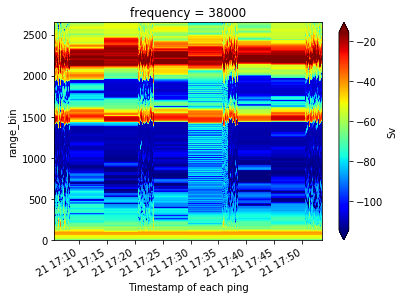

In [11]:
import matplotlib.pyplot as plt
tmp_echo.Sv.name = "Sv"
tmp_echo.Sv.isel(frequency=0).plot(x='ping_time', y='range_bin', cmap='jet', robust=True)
plt.show()

**Call `get_MVBS` to get MVBS**

In [12]:
tmp_echo.get_MVBS()

**Plot MVBS**

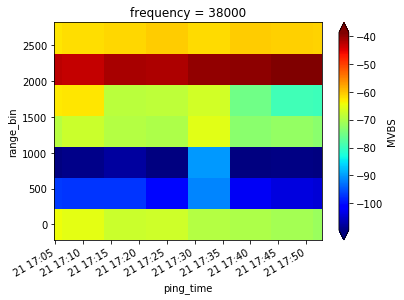

In [13]:
tmp_echo.MVBS.MVBS.isel(frequency=0).plot(x='ping_time', y='range_bin', cmap='jet', robust=True)
plt.show()

**AND YOU'RE DONE!!!**